In [120]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#make plots inline 
%matplotlib inline

# model preprocessors
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LinearRegression

# evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Problem defintion

> predict the **petrol consumption** by using given data

# 2. Data

In [35]:
df = pd.read_csv("data/petrol_consumption.csv")

In [37]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


# 3. Evaluation & 4. Features

### data analysis

In [42]:
df.shape

(48, 5)

In [44]:
df.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

all are int and float

In [47]:
df.isna().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

There is no null value

### Visualization

Text(0.5, 1.0, 'petrol consumption')

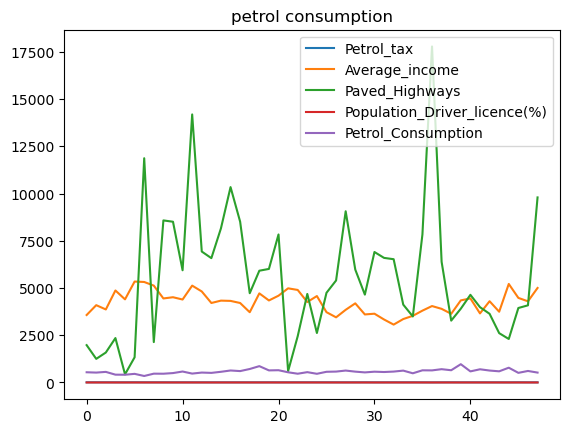

In [57]:
plt.plot(df)
plt.legend(df.columns)
plt.title("petrol consumption")

In [61]:
corr = df.corr()
corr

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


<Axes: >

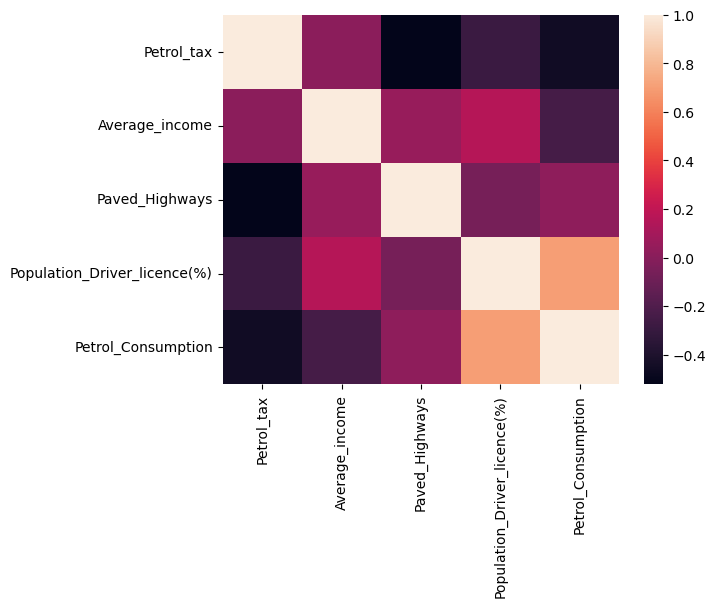

In [63]:
sns.heatmap(corr)

# 5. Model

### data preprocessing 

In [73]:
x = df.drop("Petrol_Consumption", axis=1)
y = df.Petrol_Consumption

In [77]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

### modeling

In [100]:
rg = LinearRegression()

In [102]:
rg.fit(xtrain,ytrain)

LinearRegression()

In [104]:
rg.coef_

array([-3.39893013e+01, -5.96198257e-02, -1.63569484e-03,  1.44030173e+03])

In [106]:
rg.intercept_

278.484049592409

In [114]:
xtest,ytest

(    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)
 34         8.0            3528            3495                         0.487
 40         7.0            4449            4639                         0.626
 27         7.5            3846            9061                         0.579
 9          7.0            4512            8507                         0.552
 17         7.0            3718            4725                         0.540
 15         7.0            4318           10340                         0.586
 31         7.0            3333            6594                         0.513
 10         8.0            4391            5939                         0.530
 47         7.0            5002            9794                         0.593
 20         7.0            4593            7834                         0.663,
 34    487
 40    587
 27    631
 9     498
 17    714
 15    635
 31    554
 10    580
 47    524
 20    649
 Name: Petrol_Consumption, dtyp

In [116]:
ypred = rg.predict(xtest)

In [118]:
ypred

array([491.941084  , 669.35123151, 613.38011184, 552.68598672,
       588.92670547, 610.22426314, 569.93507798, 498.42451064,
       580.41950383, 708.83109564])

### MSE, MAE

In [129]:
mse = mean_squared_error(ytest, ypred)
mse

4003.573097890718

In [131]:
mae = mean_absolute_error(ytest, ypred)
mae

52.3208388593295